# Importing librarys

In [1]:
# importing librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

## Download the data

In [ ]:
baba_long_data = yf.download("BABA", period="max", interval="1d")

[*********************100%***********************]  1 of 1 completed


In [ ]:
baba_long_data.head()

Price,Close,High,Low,Open,Volume
Ticker,BABA,BABA,BABA,BABA,BABA
Date,,,,,
2014-09-19,90.673950,96.284936,86.868906,89.524709,271879400
2014-09-22,86.810966,89.766149,86.434326,89.524712,66657800
2014-09-23,84.184128,87.380754,83.652972,85.893503,39009800
2014-09-24,87.467667,87.467667,84.232417,85.439600,32088000
2014-09-25,85.874191,88.365819,85.468579,87.969860,28598000


In [ ]:
# rename the columns
baba_long_data.columns = ["Close", "High", "Low", "Open", "Volume"]

In [ ]:
baba_long_data.tail()

,Close,High,Low,Open,Volume
Date,,,,,
2025-01-23,86.099998,86.199997,84.959999,85.800003,9225600
2025-01-24,89.139999,89.190002,86.480003,86.709999,18791000
2025-01-27,89.989998,91.430000,89.220001,90.589996,25999800
2025-01-28,96.029999,96.430000,89.900002,90.940002,31296300
2025-01-29,96.720001,101.279999,96.449997,99.389999,74962200


In [ ]:
# download the data
baba_long_data.to_csv("baba_long_data.csv")

## Loading the data

In [2]:
baba_long_data = pd.read_csv("baba_long_data.csv")

# Exploratory Analysis

In [3]:
baba_long_data.head()

,Date,Close,High,Low,Open,Volume
0,2014-09-19,90.673950,96.284936,86.868906,89.524709,271879400
1,2014-09-22,86.810966,89.766149,86.434326,89.524712,66657800
2,2014-09-23,84.184128,87.380754,83.652972,85.893503,39009800
3,2014-09-24,87.467667,87.467667,84.232417,85.439600,32088000
4,2014-09-25,85.874191,88.365819,85.468579,87.969860,28598000


In [5]:
baba_long_data.shape

(2606, 6)

In [6]:
# check for the missing values
baba_long_data.isnull().sum()

,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0


## Univariate Analysis

In [7]:
baba_long_data.describe()

,Close,High,Low,Open,Volume
count,2606.000000,2606.000000,2606.000000,2606.000000,2.606000e+03
mean,130.866882,132.573714,129.135835,130.963469,1.892449e+07
std,56.836729,57.442464,56.153612,56.917430,1.287660e+07
min,55.424198,56.641041,55.240708,55.337281,3.775300e+06
25%,82.431532,83.410128,81.501995,82.397498,1.182370e+07
50%,105.560932,107.415166,104.102655,105.907915,1.598105e+07
75%,173.300812,175.430284,170.999931,173.375665,2.156692e+07
max,306.276886,308.382206,298.328791,302.761578,2.718794e+08


In [8]:
baba_long_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2606 entries, 0 to 2605
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2606 non-null   object 
 1   Close   2606 non-null   float64
 2   High    2606 non-null   float64
 3   Low     2606 non-null   float64
 4   Open    2606 non-null   float64
 5   Volume  2606 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 122.3+ KB


In [9]:
# change Datetime data type
baba_long_data['Date'] = pd.to_datetime(baba_long_data['Date'])

In [10]:
# skewness and kurtosis
print("Skewness:", baba_long_data.select_dtypes(include=np.number).skew())
print("Kurtosis:", baba_long_data.select_dtypes(include=np.number).kurtosis())

Skewness: Close     0.774158
High      0.771905
Low       0.772879
Open      0.772185
Volume    5.627088
dtype: float64
Kurtosis: Close     -0.397827
High      -0.395313
Low       -0.412097
Open      -0.403043
Volume    71.813535
dtype: float64


## Distribution Analysis

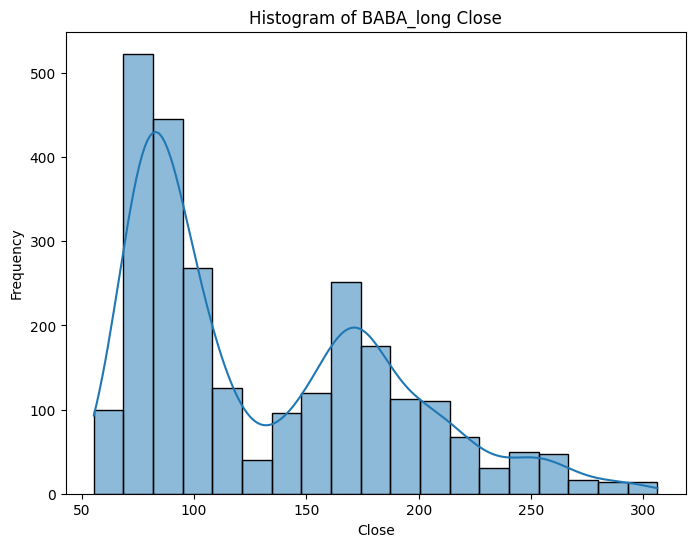

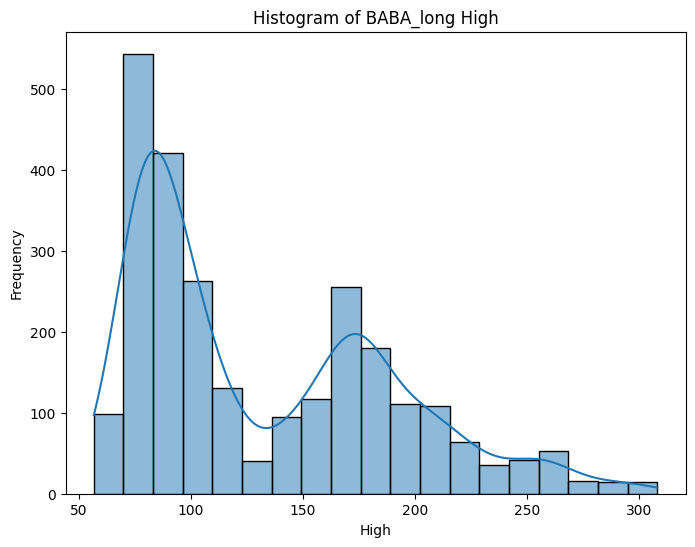

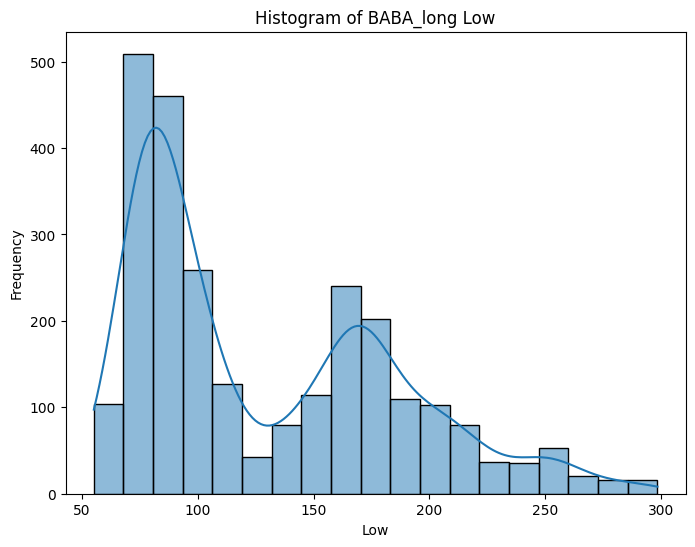

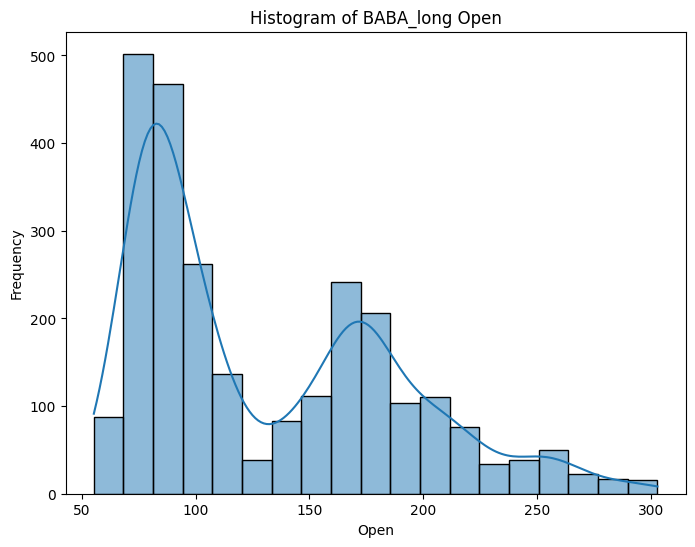

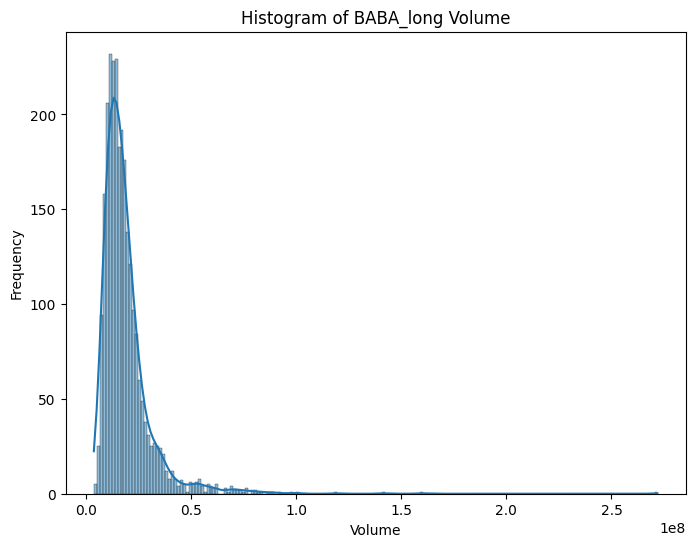

In [11]:
# Identify numerical columns
numerical_columns = baba_long_data.select_dtypes(include=[np.number]).columns

# Perform univariate analysis on numerical columns
for column in numerical_columns:
    # For continuous variables
    if len(baba_long_data[column].unique()) > 10:
        plt.figure(figsize=(8, 6))
        sns.histplot(baba_long_data[column], kde=True)
        plt.title(f'Histogram of BABA_long {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

## Trend Analysis

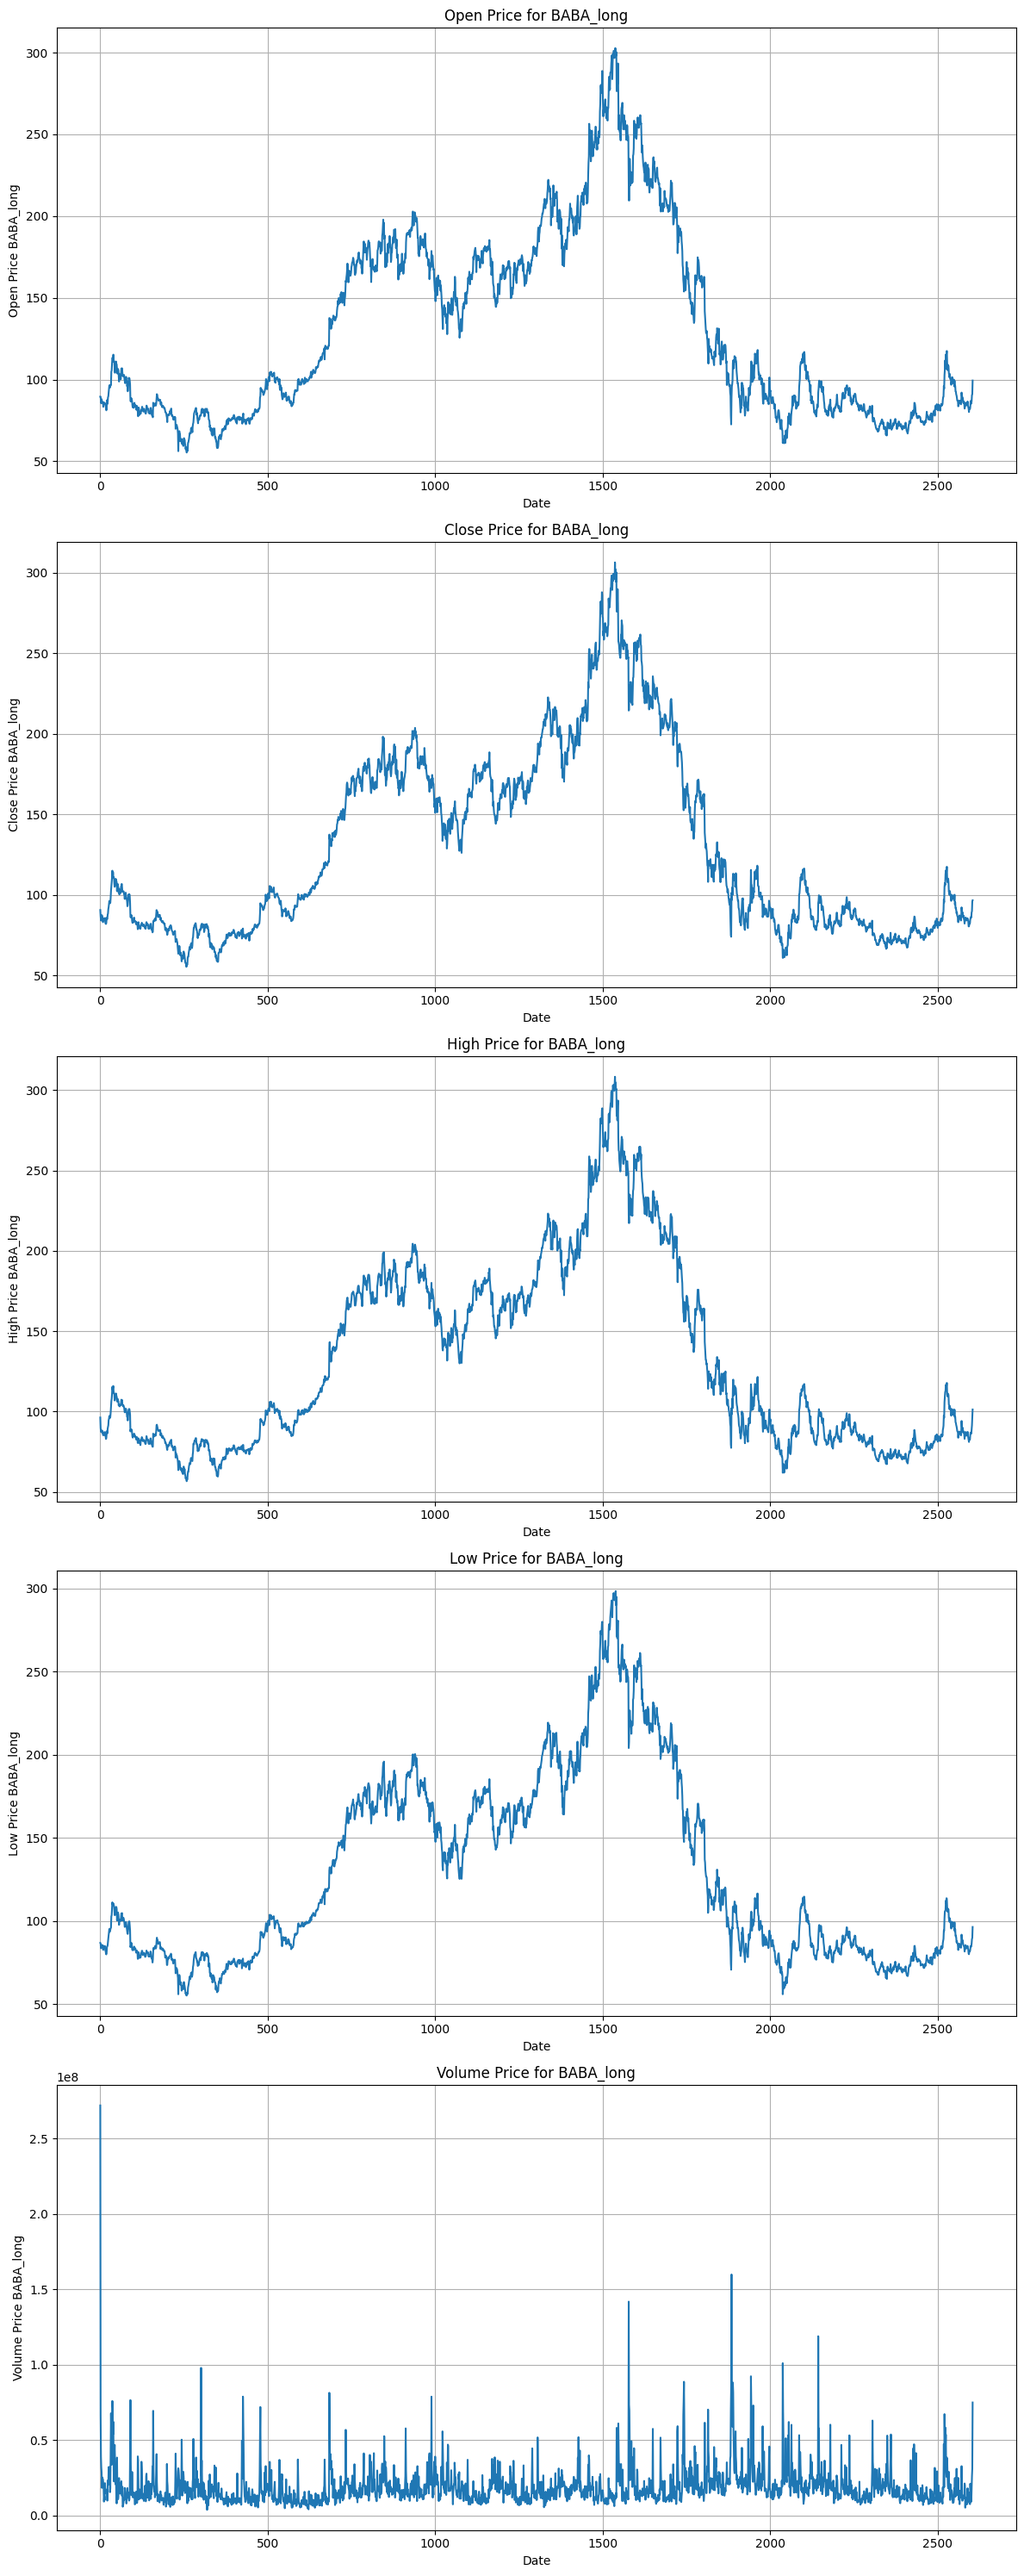

In [12]:
# List of columns to plot
columns = ['Open', 'Close', 'High', 'Low', 'Volume']

# Create subplots
fig, axes = plt.subplots(len(columns), 1, figsize=(12, 6 * len(columns)))

# Loop through each column and plot
for i, col in enumerate(columns):
    axes[i].plot(baba_long_data.index, baba_long_data[col])
    axes[i].set_title(f'{col} Price for BABA_long')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(f'{col} Price BABA_long')
    axes[i].grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

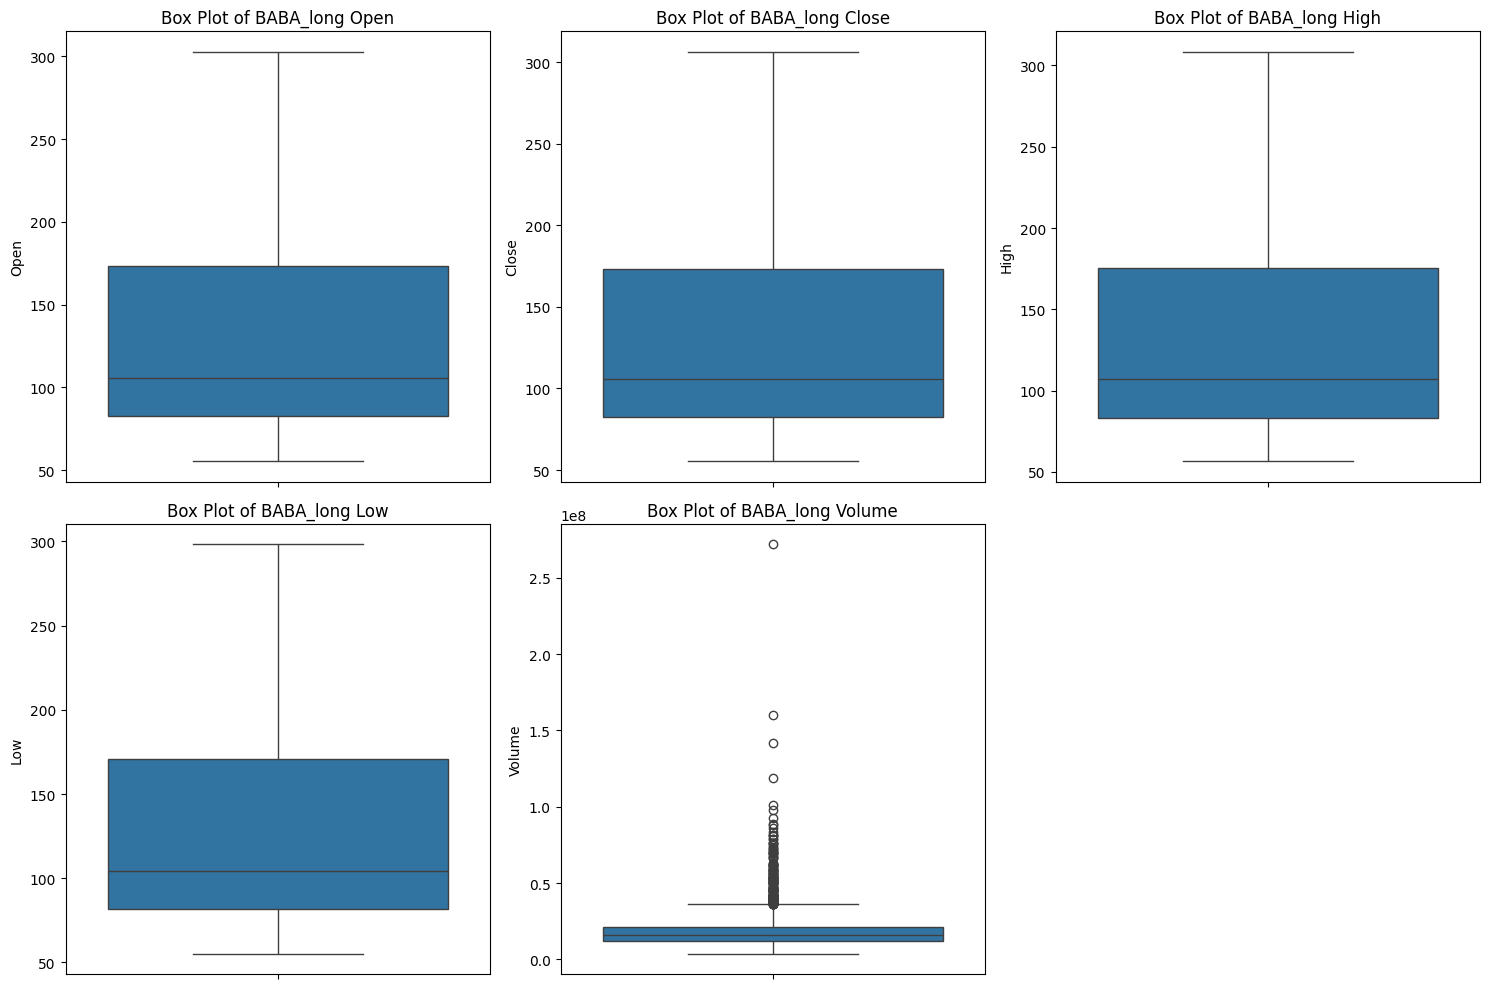

In [13]:
columns = ['Open', 'Close', 'High', 'Low', 'Volume']  # Columns to check

plt.figure(figsize=(15, 10))  # Adjust figure size as needed

for i, col in enumerate(columns):
    plt.subplot(2, 3, i + 1)  # Create subplots for each column
    sns.boxplot(y=baba_long_data[col])
    plt.title(f'Box Plot of BABA_long {col}')

plt.tight_layout()
plt.show()

## Bivariate Analysis

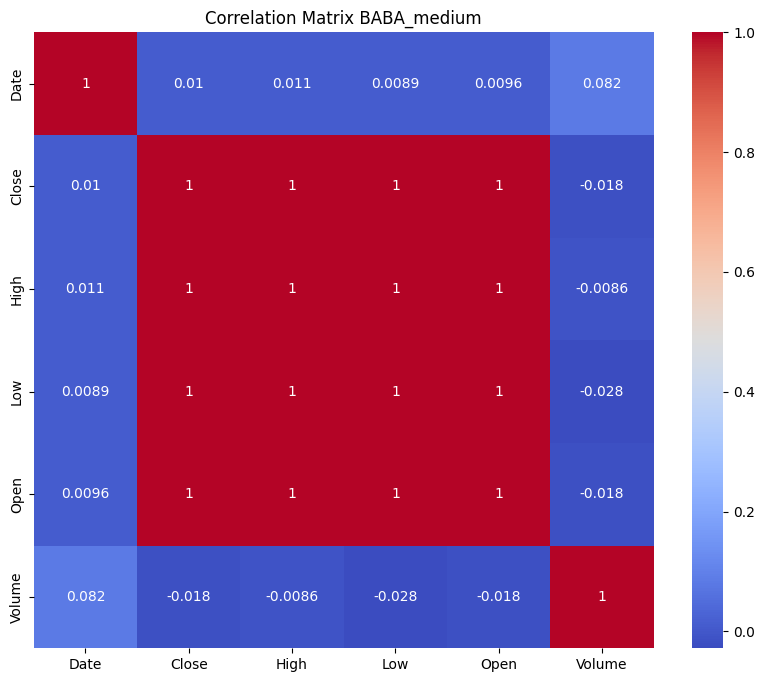

In [14]:
correlation_matrix = baba_long_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix BABA_medium')
plt.show()

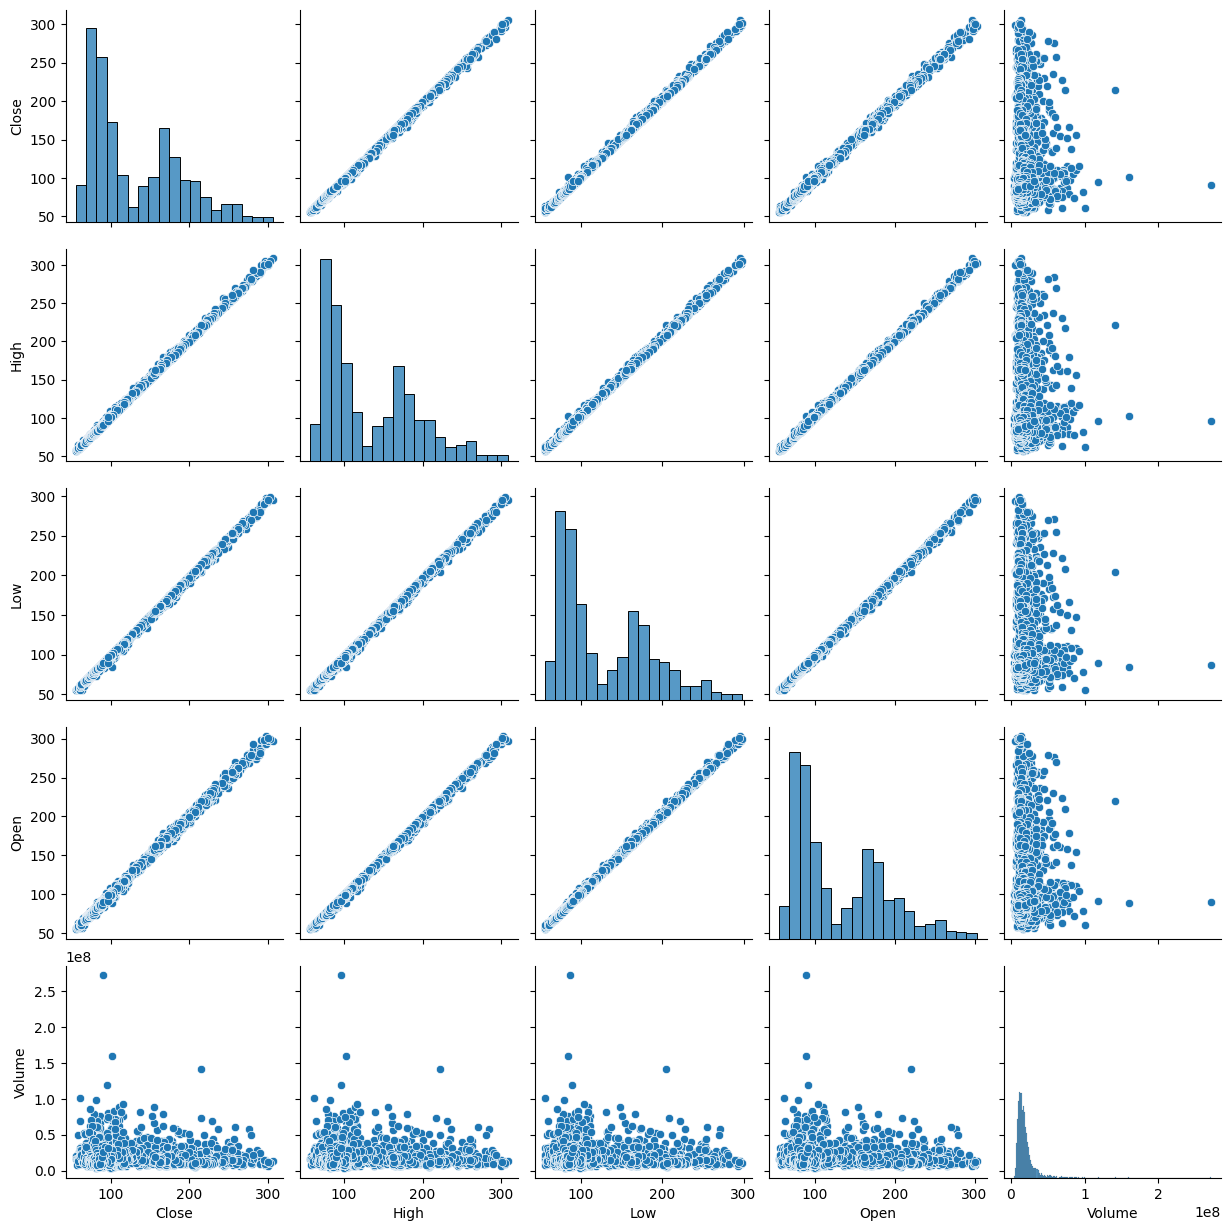

In [15]:
# pairs of numerical columns
sns.pairplot(baba_long_data.select_dtypes(include=np.number))
plt.show()

Text(0.5, 1.0, 'BABA_long Relationship between Close Price and Trading Volume')

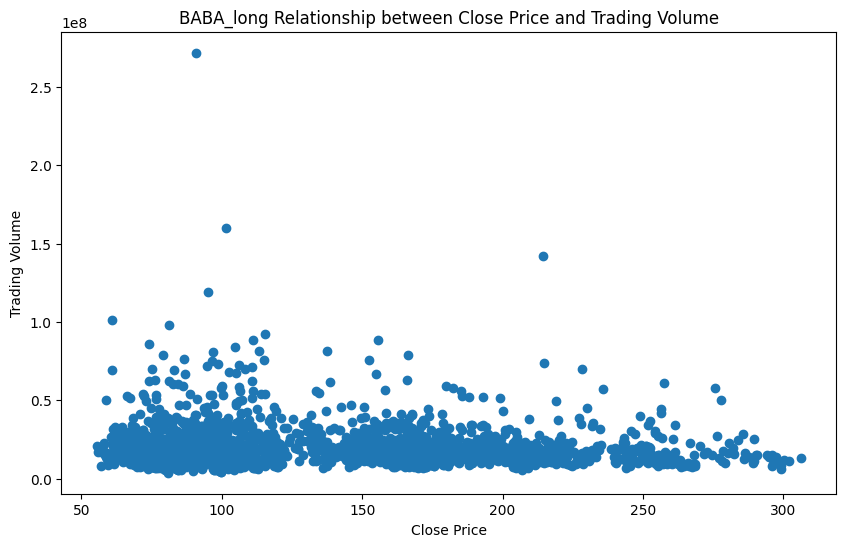

In [16]:
# relationship between price and trading volume
plt.figure(figsize=(10, 6))
plt.scatter(baba_long_data['Close'], baba_long_data['Volume'])
plt.xlabel('Close Price')
plt.ylabel('Trading Volume')
plt.title('BABA_long Relationship between Close Price and Trading Volume')

# Feature Engineering

In [17]:
# Moving Average (SMA) with a 365-day window
window_sma = 365
baba_long_data['SMA'] = baba_long_data['Close'].rolling(window=window_sma).mean()

# Bollinger Bands with a 365-day window
baba_long_data['StdDev'] = baba_long_data['Close'].rolling(window=window_sma).std()
baba_long_data['UpperBand'] = baba_long_data['SMA'] + (2 * baba_long_data['StdDev'])
baba_long_data['LowerBand'] = baba_long_data['SMA'] - (2 * baba_long_data['StdDev'])

# RSI with a 60-day window
def calculate_rsi(data, window=60):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

baba_long_data['RSI'] = calculate_rsi(baba_long_data)

In [20]:
baba_long_data.isna().sum()

,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0
SMA,0
StdDev,0
UpperBand,0
LowerBand,0


In [19]:
# FILL NA with mean
baba_long_data.fillna(baba_long_data.mean(), inplace=True)

In [21]:
baba_long_data.isna().sum()

,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0
SMA,0
StdDev,0
UpperBand,0
LowerBand,0


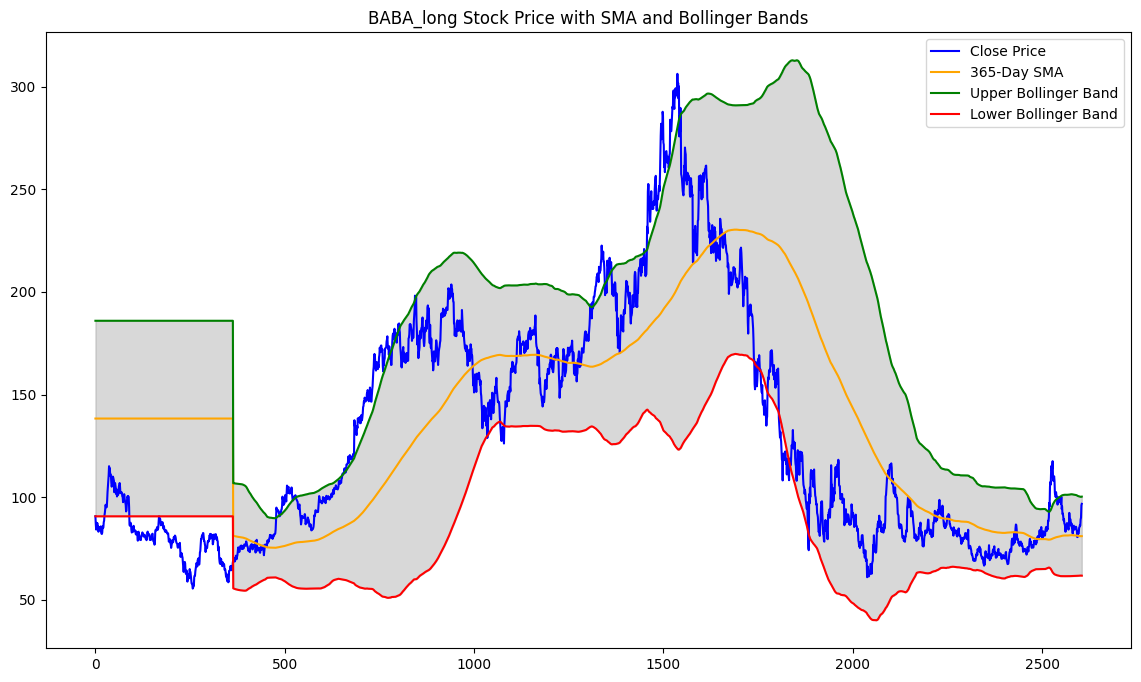

In [23]:
# Plot Close Price, SMA, and Bollinger Bands
plt.figure(figsize=(14, 8))
plt.plot(baba_long_data['Close'], label='Close Price', color='blue')
plt.plot(baba_long_data['SMA'], label=f'{window_sma}-Day SMA', color='orange')
plt.plot(baba_long_data['UpperBand'], label='Upper Bollinger Band', color='green')
plt.plot(baba_long_data['LowerBand'], label='Lower Bollinger Band', color='red')
plt.fill_between(baba_long_data.index, baba_long_data['UpperBand'], baba_long_data['LowerBand'], color='gray', alpha=0.3)
plt.title('BABA_long Stock Price with SMA and Bollinger Bands')
plt.legend()
plt.show()

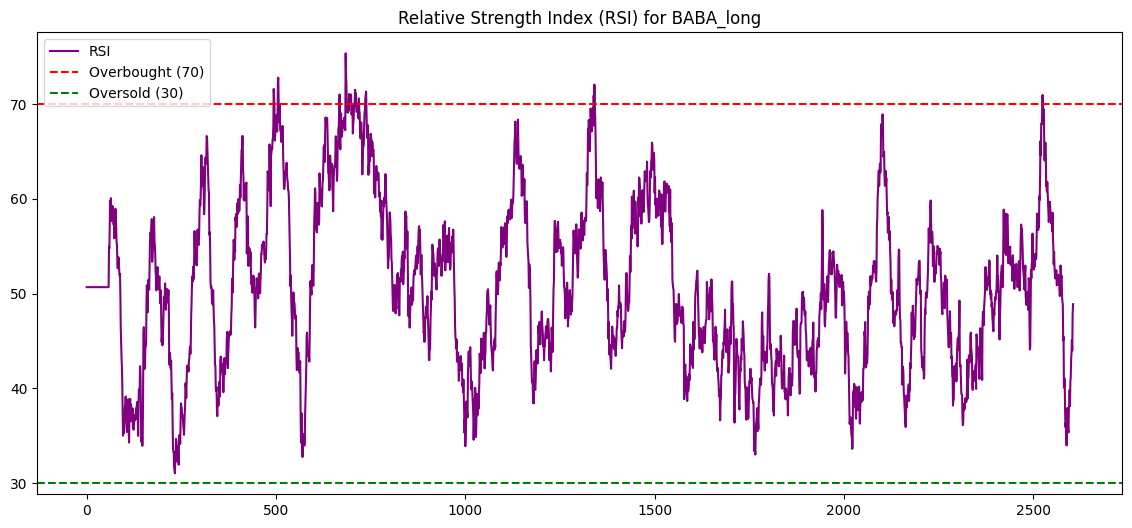

In [24]:
# Plot RSI
plt.figure(figsize=(14, 6))
plt.plot(baba_long_data['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', color='red', label='Overbought (70)')
plt.axhline(30, linestyle='--', color='green', label='Oversold (30)')
plt.title('Relative Strength Index (RSI) for BABA_long')
plt.legend()
plt.show()

In [25]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.9 MB/s eta 0:00:00


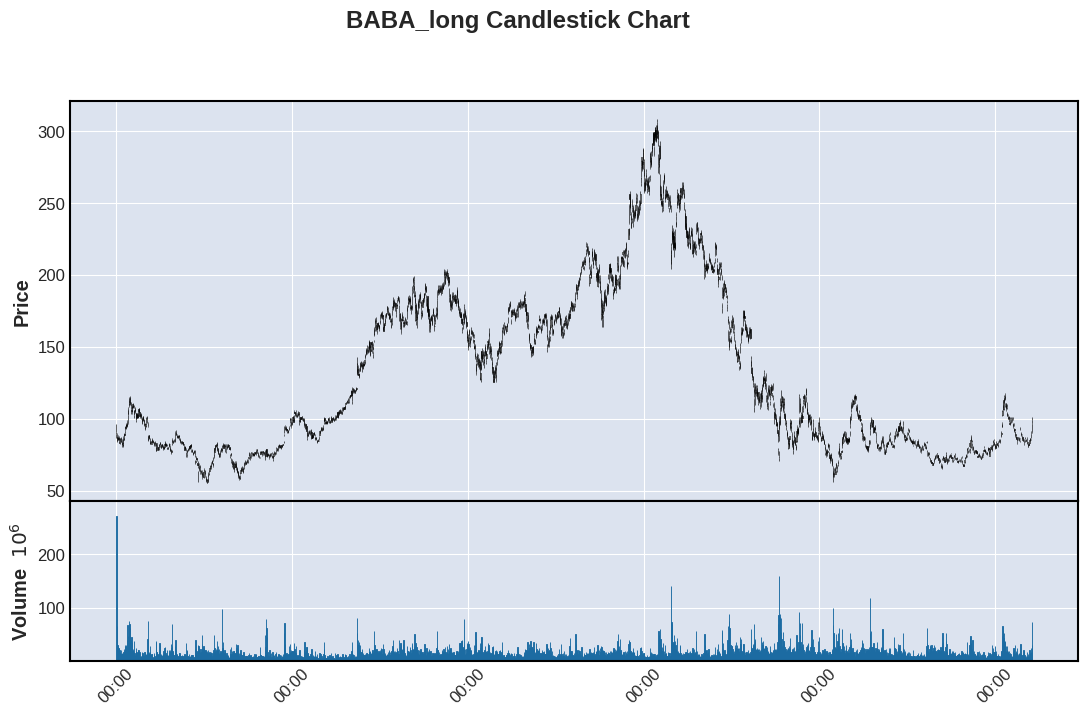

In [26]:
import mplfinance as mpf

# Ensure the index is a datetime object
baba_long_data.index = pd.to_datetime(baba_long_data.index)

# Plot candlestick chart
mpf.plot(baba_long_data, type='candle', volume=True, figsize=(14, 8),
         title='BABA_long Candlestick Chart')

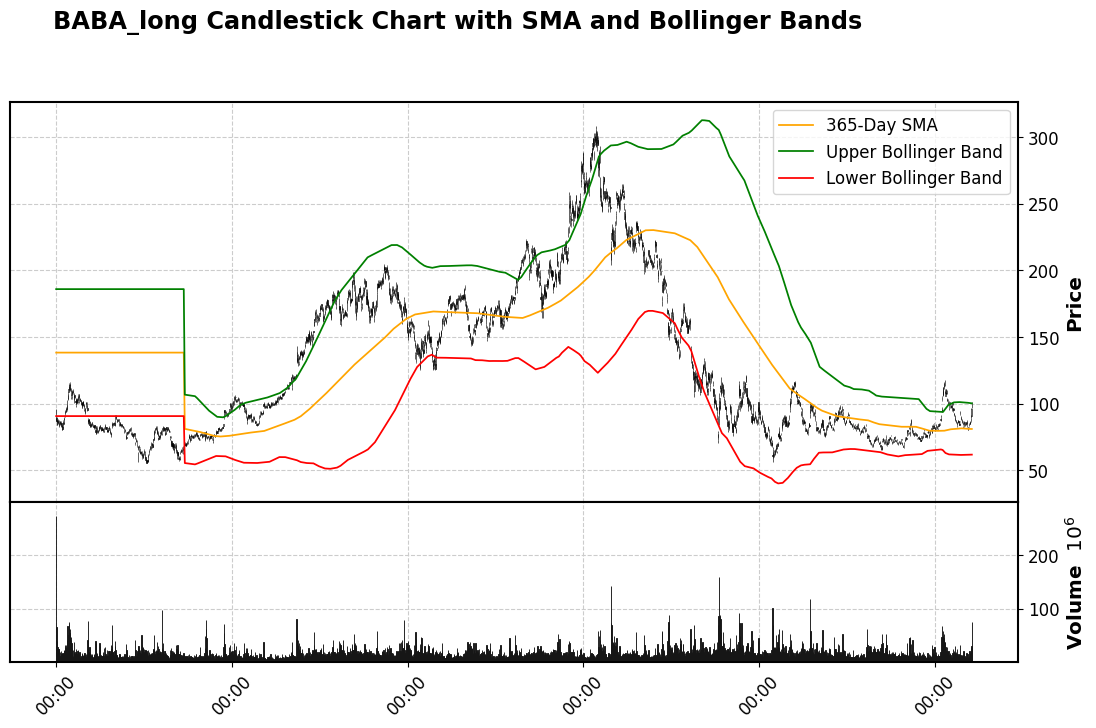

In [27]:
ap = [
    mpf.make_addplot(baba_long_data['SMA'], color='orange', label=f'{window_sma}-Day SMA'),
    mpf.make_addplot(baba_long_data['UpperBand'], color='green', label='Upper Bollinger Band'),
    mpf.make_addplot(baba_long_data['LowerBand'], color='red', label='Lower Bollinger Band')
]

# Plot candlestick chart with SMA and Bollinger Bands
mpf.plot(
    baba_long_data,
    type='candle',
    volume=True,
    addplot=ap,
    figsize=(14, 8),
    title='BABA_long Candlestick Chart with SMA and Bollinger Bands',
    style='classic'  # You can change the style (e.g., 'classic', 'yahoo', 'charles')
)

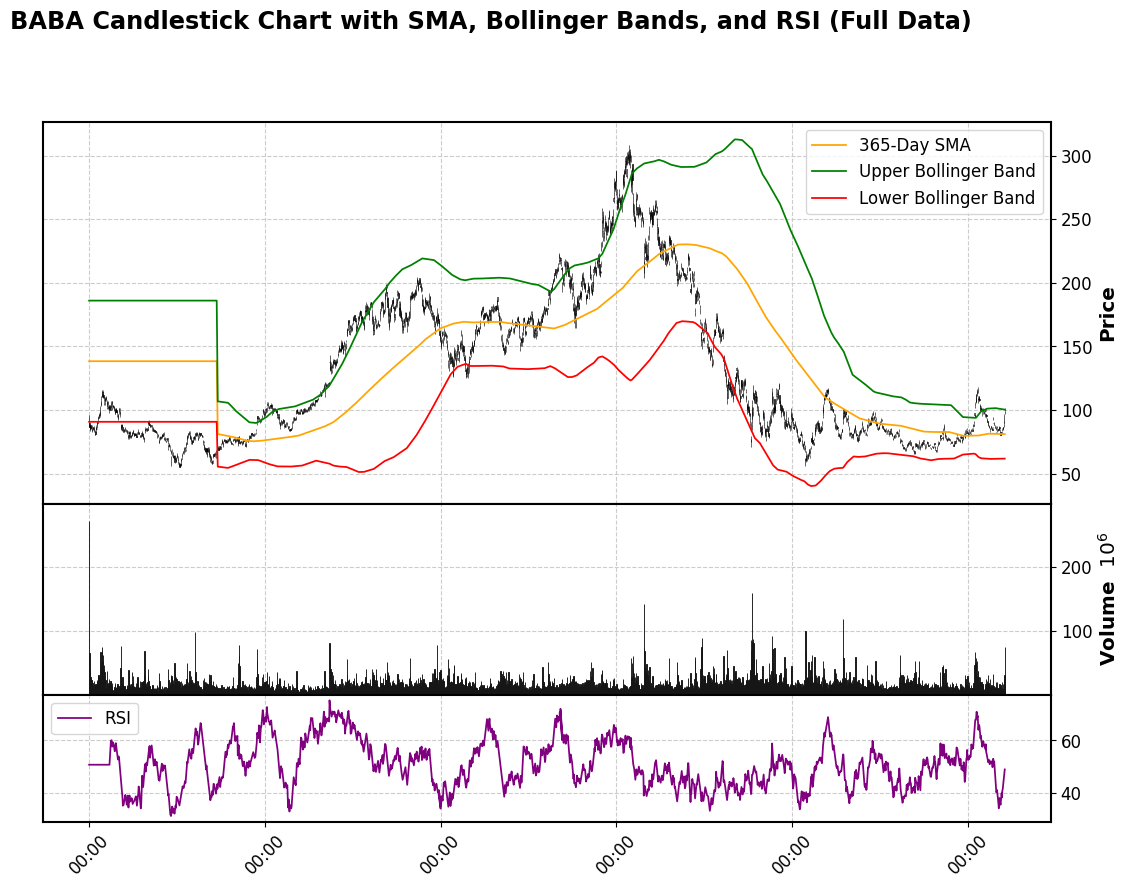

In [28]:
ap = [
    mpf.make_addplot(baba_long_data['SMA'], color='orange', label=f'{window_sma}-Day SMA'),
    mpf.make_addplot(baba_long_data['UpperBand'], color='green', label='Upper Bollinger Band'),
    mpf.make_addplot(baba_long_data['LowerBand'], color='red', label='Lower Bollinger Band'),
    mpf.make_addplot(baba_long_data['RSI'], panel=2, color='purple', label='RSI')  # RSI in a separate panel
]

# Plot candlestick chart with SMA, Bollinger Bands, and RSI
mpf.plot(
    baba_long_data,
    type='candle',
    volume=True,
    addplot=ap,
    figsize=(14, 10),
    title='BABA Candlestick Chart with SMA, Bollinger Bands, and RSI (Full Data)',
    style='classic',
    panel_ratios=(6, 3, 2)  # Adjust panel ratios for main chart, RSI, and volume
)

## Time Series Decomposition

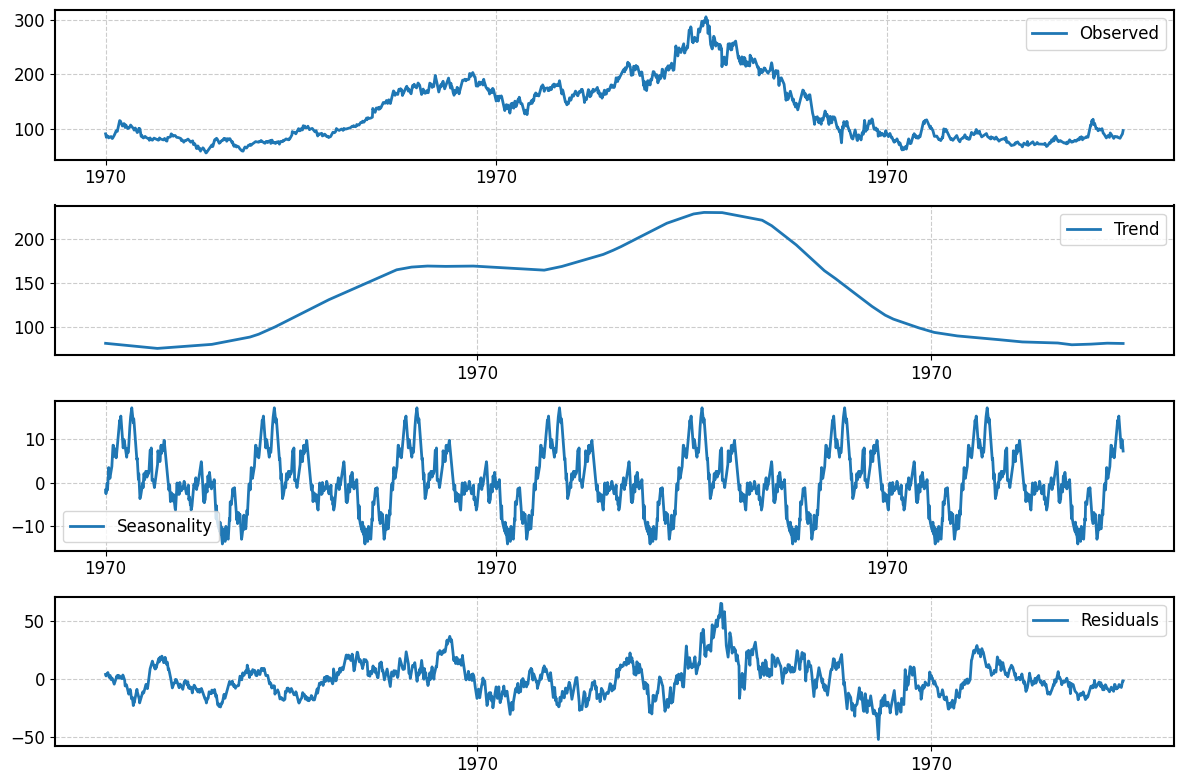

In [29]:
# Decompose the time series into trend, seasonality, and residual
decomposition = seasonal_decompose(baba_long_data['Close'], model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Daily Returns & Volatility

Historical Volatility (Standard Deviation of Daily Returns): 2.61%


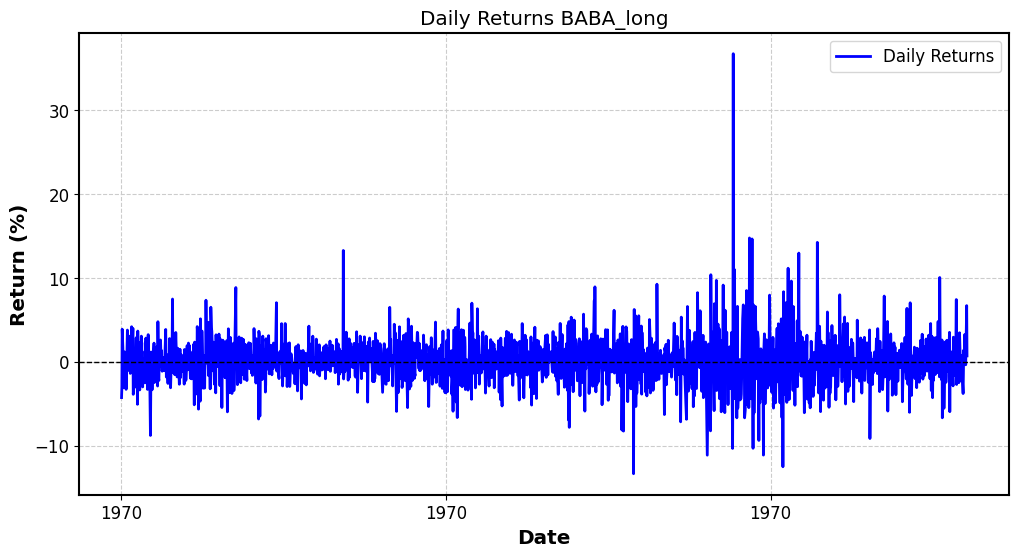

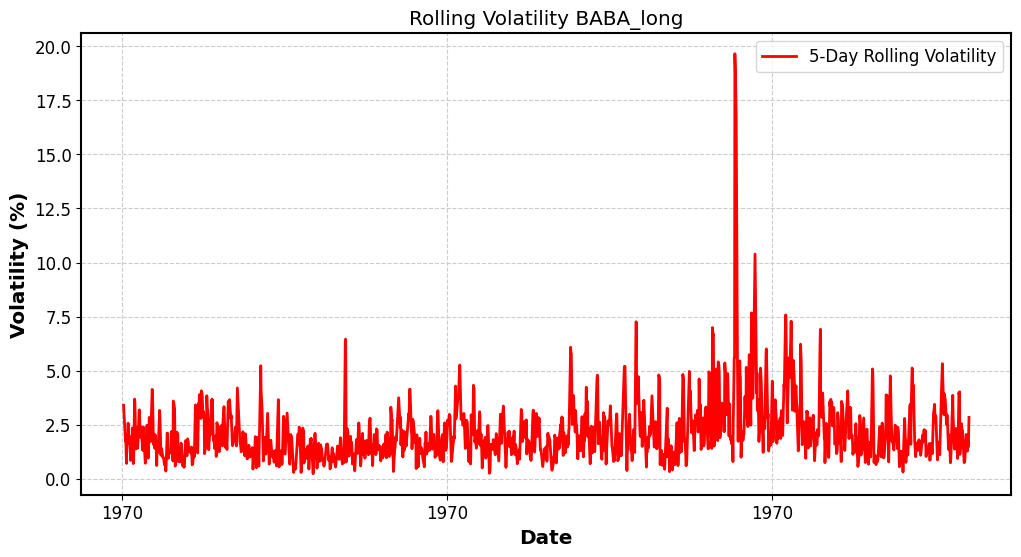

In [32]:
# Calculate daily returns
baba_long_data['Daily_Return'] = baba_long_data['Close'].pct_change() * 100  # Percentage change

# Calculate historical volatility (standard deviation of daily returns)
historical_volatility = baba_long_data['Daily_Return'].std()

# Print historical volatility
print(f"Historical Volatility (Standard Deviation of Daily Returns): {historical_volatility:.2f}%")

# Plot daily returns
plt.figure(figsize=(12, 6))
plt.plot(baba_long_data['Daily_Return'], label='Daily Returns', color='blue')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Daily Returns BABA_long')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.legend()
plt.show()

# Calculate rolling volatility (e.g., 5-day rolling standard deviation)
rolling_window = 5  # Adjust the window size as needed
baba_long_data['Rolling_Volatility'] = baba_long_data['Daily_Return'].rolling(window=rolling_window).std()

# Plot rolling volatility
plt.figure(figsize=(12, 6))
plt.plot(baba_long_data['Rolling_Volatility'], label=f'{rolling_window}-Day Rolling Volatility', color='red')
plt.title('Rolling Volatility BABA_long')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.show()

In [33]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(baba_long_data['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Interpret the result
if result[1] <= 0.05:
    print("The data is stationary (reject the null hypothesis).")
else:
    print("The data is non-stationary (fail to reject the null hypothesis).")

ADF Statistic: -1.2860627918945928
p-value: 0.6355242378864138
Critical Values:
   1%: -3.4328881235621926
   5%: -2.862661344607029
   10%: -2.567366932602502
The data is non-stationary (fail to reject the null hypothesis).


In [34]:
# Apply differencing
baba_long_data['Close_diff'] = baba_long_data['Close'].diff().dropna()

In [35]:
baba_long_data.isna().sum()

,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0
SMA,0
StdDev,0
UpperBand,0
LowerBand,0


In [36]:
# drop na
baba_long_data.dropna(inplace=True)

In [37]:
# Recheck stationarity using ADF test
result = adfuller(baba_long_data['Close_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] <= 0.05:
    print("The differenced data is stationary.")
else:
    print("The differenced data is still non-stationary.")

ADF Statistic: -10.955983786639091
p-value: 8.560189362581222e-20
The differenced data is stationary.


<Figure size 1000x500 with 0 Axes>

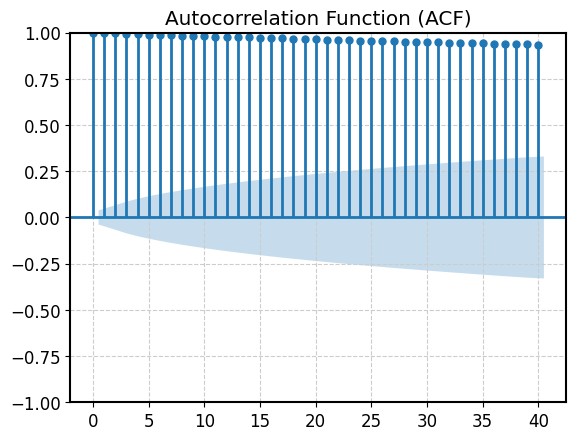

In [38]:
plt.figure(figsize=(10, 5))
plot_acf(baba_long_data['Close'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

<Figure size 1000x500 with 0 Axes>

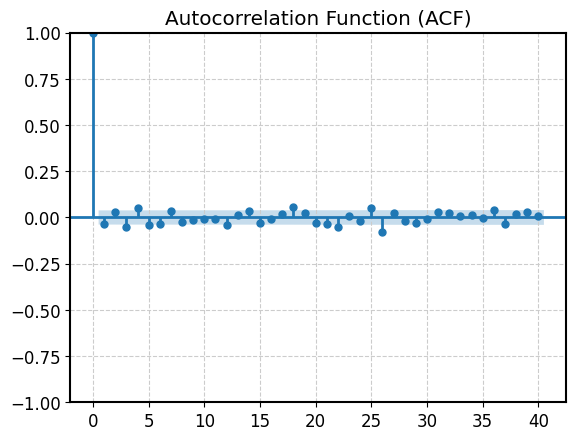

In [39]:
plt.figure(figsize=(10, 5))
plot_acf(baba_long_data['Close_diff'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# LSTM Model

In [ ]:
# get the Date out of the index
baba_long_data.reset_index(inplace=True)

In [ ]:
# isolet the Date and Sales columns
baba_long_data = baba_long_data[['Date', 'Close_diff']]

In [ ]:
baba_long_data

,Date,Close_diff
0,2016-03-09,1.313416
1,2016-03-10,-0.444244
2,2016-03-11,1.970123
3,2016-03-14,-0.637390
4,2016-03-15,-1.081635
...,...,...
2232,2025-01-23,-0.300003
2233,2025-01-24,3.040001
2234,2025-01-27,0.849998
2235,2025-01-28,6.040001


In [ ]:
# Split into training and testing sets based on index
train_size = int(len(baba_long_data) * 0.8)  # 80% for training
train_data = baba_long_data[:train_size]
test_data = baba_long_data[train_size:]

In [ ]:
# set the date coumn as index
train_data.set_index('Date', inplace=True)
test_data.set_index('Date', inplace=True)

In [ ]:
train_data

,Close_diff
Date,
2016-03-09,1.313416
2016-03-10,-0.444244
2016-03-11,1.970123
2016-03-14,-0.637390
2016-03-15,-1.081635
...,...
2023-04-11,-1.719025
2023-04-12,-5.717232
2023-04-13,2.250191


In [ ]:
test_data

,Close_diff
Date,
2023-04-18,-0.898155
2023-04-19,-1.931488
2023-04-20,-2.655800
2023-04-21,-1.554855
2023-04-24,-2.163277
...,...
2025-01-23,-0.300003
2025-01-24,3.040001
2025-01-27,0.849998


In [ ]:
# look at train data date range
train_data.index.min(), train_data.index.max()

(Timestamp('2016-03-09 00:00:00'), Timestamp('2023-04-17 00:00:00'))

In [ ]:
# look at the test data date range
test_data.index.min(), test_data.index.max()

(Timestamp('2023-04-18 00:00:00'), Timestamp('2025-01-29 00:00:00'))

In [ ]:
scaler = MinMaxScaler()

train_data.loc[:, 'x'] = scaler.fit_transform(train_data[['Close_diff']])
test_data.loc[:, 'x'] = scaler.transform(test_data[['Close_diff']])

In [ ]:
# Create sequences for the LSTM model
sequence_length = 100
train_sequences = []
test_sequences = []

for i in range(len(train_data) - sequence_length):
    train_sequences.append(train_data['x'].iloc[i:i+sequence_length].values)

for i in range(len(test_data) - sequence_length):
    test_sequences.append(test_data['x'].iloc[i:i+sequence_length].values)

train_sequences = np.array(train_sequences)
test_sequences = np.array(test_sequences)

In [ ]:
# Prepare train and test targets
train_targets = train_data['x'].iloc[sequence_length:].values
test_targets = test_data['x'].iloc[sequence_length:].values

In [ ]:
import time
start_time = time.time()

# Create and train an LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_sequences.reshape(-1, sequence_length, 1), train_targets,
epochs=5, batch_size=32)

# Make predictions
test_predictions = model.predict(
                   test_sequences.reshape(-1, sequence_length, 1))

print(time.time() - start_time)

# Inverse transform the predictions to the original scale
test_predictions = scaler.inverse_transform(test_predictions).flatten()
test_targets = scaler.inverse_transform(test_targets.reshape(-1, 1))

Epoch 1/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.1110
Epoch 2/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0053
Epoch 3/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0047
Epoch 4/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0047
Epoch 5/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0048
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
15.314179182052612


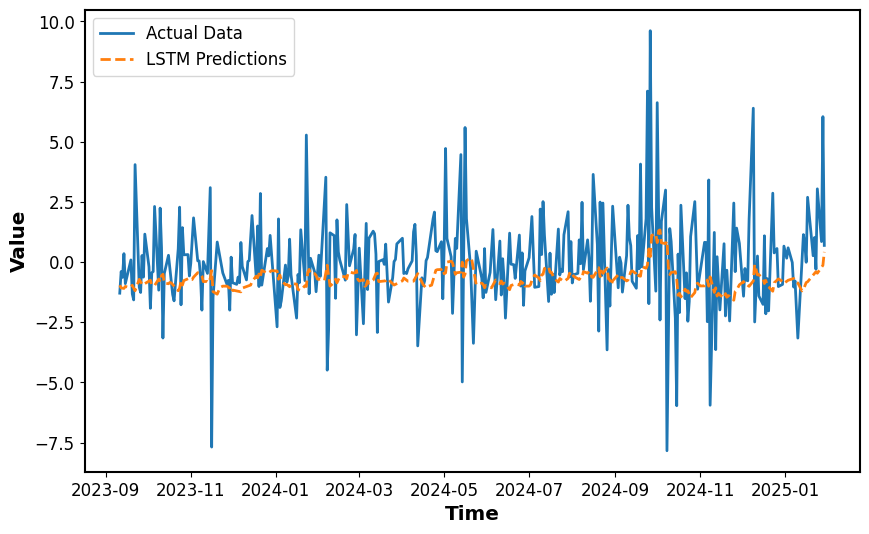

In [ ]:
# Plot the original data and LSTM predictions
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[sequence_length:], test_targets,
label="Actual Data", linestyle='-')
plt.plot(test_data.index[sequence_length:], test_predictions,
label="LSTM Predictions", linestyle='--')
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(False)
plt.show()

In [ ]:
# measure of prediction accuracy
test_predictions_df = pd.DataFrame(test_predictions, columns = ["LSTM"])
test_targets_df = pd.DataFrame(test_targets, columns = ["actuals"])
predictions = pd.concat([test_predictions_df, test_targets_df], axis=1)

wape = (predictions['actuals'] - predictions['LSTM']).abs().sum() / predictions['actuals'].sum()

print(wape * 100)

5378.48034886761


In [ ]:
# predict for the next one year
last_sequence = test_sequences[-1]
predicted_values = []

for _ in range(365):
    predicted_value = model.predict(last_sequence.reshape(1, sequence_length, 1))
    predicted_values.append(predicted_value[0, 0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = predicted_value

predicted_values = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1)).flatten()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━

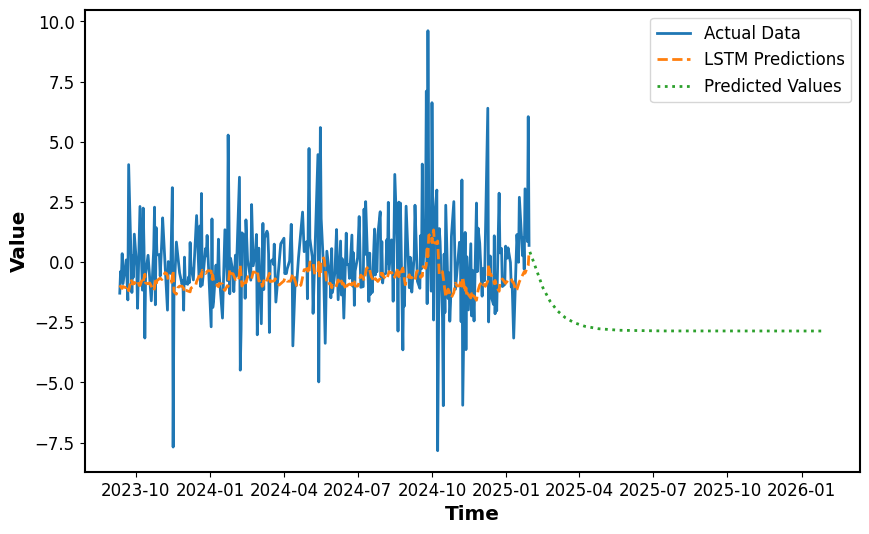

In [ ]:
# show in plot
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[sequence_length:], test_targets,
label="Actual Data", linestyle='-')
plt.plot(test_data.index[sequence_length:], test_predictions,
label="LSTM Predictions", linestyle='--')

# Generate a date range for the predicted values
# Assuming your test_data has a daily frequency
from pandas.tseries.offsets import DateOffset
future_dates = pd.date_range(start=test_data.index[-1], periods=365 + 1, freq='D')[1:]  # Exclude the start date

# Now plot the predicted values against the future dates
plt.plot(future_dates, predicted_values,
         label="Predicted Values", linestyle=':')

plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(False)
plt.show()